# 9/18: Function definitions & function calls.

**Note:** This is a copy of the 9/18 notes, including the modified Old McDonald code from class.

## Abstraction

Below are two maps of the London Underground, a train system in London. Which map do you prefer?

**Map 1.**

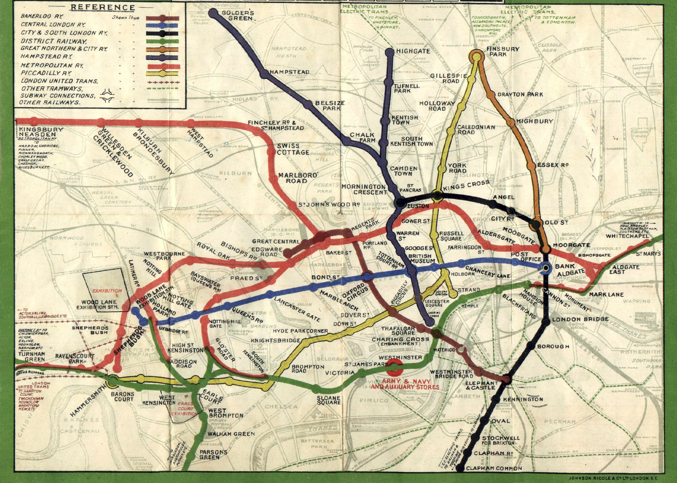

**Map 2.**

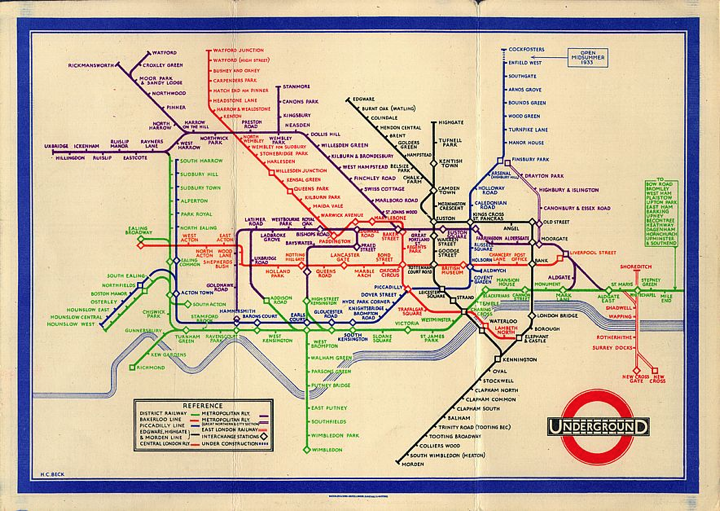

<br>
<font size=+1>
"The essence of abstractions is preserving information that is relevant in a given context, and forgetting information that is irrelevant in that context."
</font>
--John V. Guttag, Introduction to Computation and Programming Using Python
<br>

The maps above are a form of abstraction--they shows only the information relevant to helping you reach your destination.

## Abstraction in computer science

In computer science, **functions** are a form of abstraction:
- When we call a function, we only need to think about what parameters it takes and what it returns.
- We don't need to think about how the function is implemented.

For example, here's our pictures from earlier in the course about the `max()` and `print()` functions:

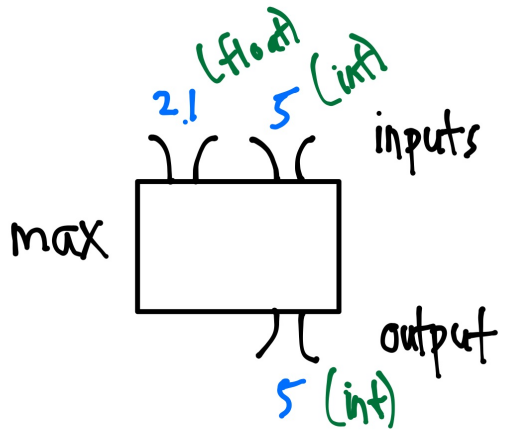

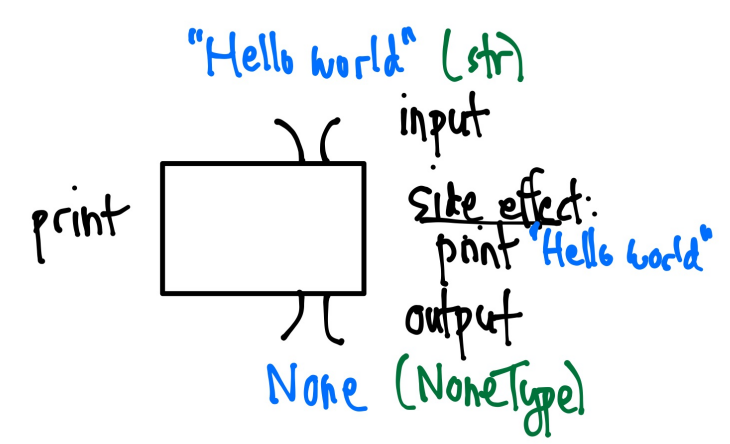

## Example: Old McDonald

Let's write a program that prints the lyrics of the song, "Old McDonald." We'll build off the following code:

In [ ]:
print('Old McDonald had a farm, EIEIO.')
print('And on his farm he had some chicks, EIEIO.')
print('With a cluck-cluck here, and a cluck-cluck there,')
print('Here a cluck, there a cluck, everywhere a cluck-cluck.')
print('Old McDonald had a farm, EIEIO.')

print()

print('Old McDonald had a farm, EIEIO.')
print('And on his farm he had some cows, EIEIO.')
print('With a moo-moo here, and a moo-moo there,')
print('Here a moo, there a moo, everywhere a moo-moo.')
print('Old McDonald had a farm, EIEIO.')

Modified version using a function definition:

In [ ]:
def print_verse(animals, sound):
    print('Old McDonald had a farm, EIEIO.')
    print('And on his farm he had some ' + animals + ', EIEIO.')
    print('With a ' + sound + '-' + sound + ' here, and a '
          + sound + '-' + sound + ' there,')
    print('Here a ' + sound + ', there a ' + sound + ', everywhere a '
          + sound + '-' + sound + ',')
    print('Old McDonald had a farm, EIEIO.')

print_verse('chicks', 'cluck')

print()

print_verse('cows', 'moo')

print()

print_verse('ducks', 'quack')

## The `def` statement

We've seen three kinds of statements so far:

- expression statements
- assignment statements
- `if`-`elif`-`else` statements

Today we'll learn about one more kind of statement:

- `def` statements

A `def` statement defines a function. Here are some examples:

In [ ]:
# Print a greeting using the given name.
# name - a user's name (str).
# Returns None (NoneType).
def print_greeting(name):
    print('Hello, ' + name + '!')

In [ ]:
# Determine a student's letter grade, including bonus points.
# grade - a grade, between 0 and 100 (int or float).
# bonus - a number of bonus points to add (int or float).
# Returns the corresponding letter grade, as a capital letter (str).
def letter_grade(grade, bonus):
    total = grade + bonus
    
    if total >= 90:
        return 'A'
    elif total >= 80:
        return 'B'
    elif total >= 70:
        return 'C'
    elif total >= 60:
        return 'D'
    else:
        return 'F'

Vocabulary:

- The **parameters** are the variable names appearing between parentheses in the `def` statement.
  - For example, the parameters of `letter_grade` are `grade` and `bonus`.
- The **arguments** are the values we pass to a function in a function call.
  - For example, in the function call `letter_grade(98, 1)`, the arguments are 98 (int) and 1 (int).
- The **body** of a function is the indented block of statements appearing within the `def` statement.

Here's the general syntax of a `def` statement:

```
def [identifier]([identifier], ... , [identifier]):
    [block]
```

The block within a `def` statement is allowed to contain any kind of statement, including a special kind of statement called a `return` statement. We'll learn about functions with `return` statements next week; for now, we're focusing on functions without `return` statements.

**Note:** A function without any `return` statements always returns None (NoneType), just like `print()`.

## Executing a `def` statement

When Python executes a `def` statement, it just records the function definition and adds it to the environment.

It **does not** execute the block of statements inside until the function is called.

Example:

In [ ]:
x = 2

def my_function(y):
    print('test1')

print('test2')

Environment before executing the `def` statement:

| | |
| - | - |
| `x`: | 2 (`int`) |

Environment after executing the `def` statement:

| | |
| - | - |
| `x`: | 2 (`int`) |
| `my_function`: | \<function\> |

We just write "\<function\>" to express that `my_function` is a function. (If we wanted to be entirely correct, we might write out the entire definition of the function, but this would be unreasonable for complicated functions, so we just write "\<function\>" instead.)

## Evaluating a function call

Let's discuss in detail how Python evaluates a function call.

Example:

In [ ]:
x = 2

def my_function(y):
    print('test1')
    y = y + 1
    print('x is', x)
    print('y is', y)

print('test2')

my_function(x)
my_function(x)

y = 8

my_function(y)
my_function(y)

See how this code executes on PythonTutor: [link](https://pythontutor.com/render.html#code=x%20%3D%202%0A%0Adef%20my_function%28y%29%3A%0A%20%20%20%20print%28'test1'%29%0A%20%20%20%20y%20%3D%20y%20%2B%201%0A%20%20%20%20print%28'x%20is',%20x%29%0A%20%20%20%20print%28'y%20is',%20y%29%0A%0Aprint%28'test2'%29%0A%0Amy_function%28x%29%0Amy_function%28x%29%0A%0Ay%20%3D%208%0A%0Amy_function%28y%29%0Amy_function%28y%29&cumulative=false&heapPrimitives=nevernest&mode=edit&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

In summary, to evaluate a function call (without `return` statements):
- Create a new empty **frame** for the function call.
- Within this new frame, set the *parameters* of the function to the *arguments* passed to the function.
- Execute the *body* of the function using the new frame.
- Destroy the frame created for the function call.
- The function returns `None` (`NoneType`).

## Environments and scope

Each function call gets its own **frame**, which includes the *parameters* and any variables defined in the body. This means:

- Outside a function definition, you can't access variables inside of the function definition.
- If you use the same variable name inside and outside of a function definition, Python considers these completely different variables.

Vocabulary:
- The **scope** of a variable refers to where in the program it can be referenced.
  - For example, the *scope* of a parameter of a function is the *body* of that function.
- A **local variable** is a variable whose scope is limited to just a part of a program.
  - For example, any variable defined within a function body is a *local variable*.
- A **global variable** is a variable whose scope is the entire program.
  
Example:

In [ ]:
x = 2

def my_function(y):
    print('test1')
    y = y + 1
    print('x is', x)
    print('y is', y)

print('test2')

my_function(x)
my_function(x)

y = 8

my_function(y)
my_function(y)

Questions:
1. Which `y`'s in the block above are the same variable? Which are different?
2. Which variables in the block above are *local variables*? Which are *global variables*?

## Practice

Trace the following blocks of code. (That is, execute the blocks of code by hand, keeping track of the current environment.)

Your final answer should consist of (1) the final environment, and (2) the printed output of the block.

Run the blocks to check your answers.

In [ ]:
def print_greeting(name):
    print('Hello, ' + name + '!')
    
print_greeting('Carmela')
print_greeting('friends')

In [ ]:
def f(x, y):
    x *= 2
    z = 10
    print(x, y)
    
x = 1
z = 3

f(x, 6)
f(z, x)

In [ ]:
def g(a, b, c):
    a = b
    b = c
    print('hello')
    print(b)

g(9, 8, 2)

a = 4
b = 5
c = 6

print(a, b, c)

g(a, b, c)
g(c, b, a)